In [1]:
import numpy as np
import sunpy.map
from sunpy.coordinates import frames

from astropy import units as u
from astropy.coordinates import SkyCoord

from sunpy.coordinates import get_body_heliographic_stonyhurst

import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
f = '2014_05_15__07_54_00_005__STEREO-A_SECCHI_COR2_white-light.jp2'
map1 = sunpy.map.Map(f)

## 1.0 Coordinates

## 1.1 WCSAxes

In [4]:
map1.coordinate_frame

<Helioprojective Frame (obstime=2014-05-15T07:54:00.005, rsun=695700000.0 m, observer=<HeliographicStonyhurst Coordinate (obstime=2014-05-15T07:54:00.005): (lon, lat, radius) in (deg, deg, m)
    (158.18219, 4.9816789, 1.4380171e+11)>)>

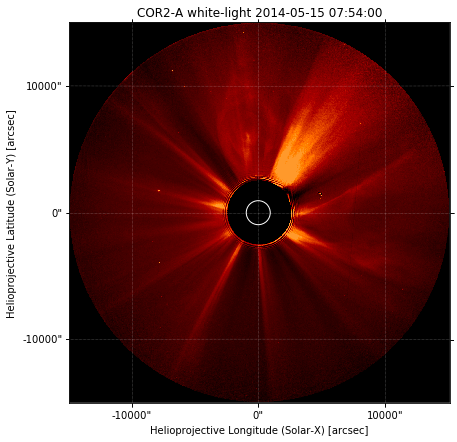

In [5]:
fig = plt.figure(figsize=(15, 15))
ax1 = fig.add_subplot(1, 2, 1, projection=map1)
map1.plot(axes=ax1, vmax=800)
map1.draw_limb()

In [6]:
type(ax1)

matplotlib.axes._subplots.WCSAxesSubplot

In [7]:
fov = (1000 * u.arcsec)
top_right = SkyCoord(0 * u.arcsec, 10000 * u.arcsec, frame=map1.coordinate_frame)
bottom_left = SkyCoord(-10000 * u.arcsec, 0 * u.arcsec, frame=map1.coordinate_frame)
smap = map1.submap(bottom_left, top_right)

Plotting uses pixel coordinates

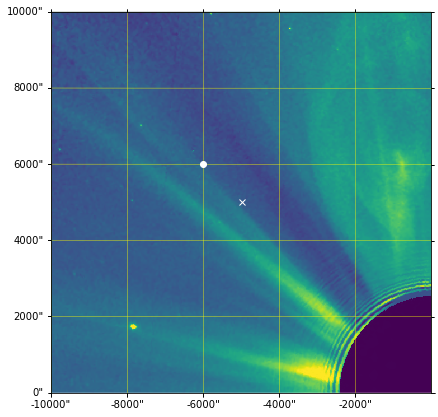

In [8]:
fig = plt.figure(figsize=(15, 15))
ax1 = fig.add_subplot(1, 2, 1, projection=smap)
ax1.imshow(smap.data)
ax1.plot(smap.data.shape[0]/2., smap.data.shape[1]/2., 'x', color='white')
ax1.coords.grid(color='yellow', linestyle='solid', alpha=0.5)

hpc_coord = [-6000, 6000] * u.arcsec
ax1.plot(hpc_coord[0].to('deg'), hpc_coord[1].to('deg'), 'o', color='white', transform=ax1.get_transform('world'))

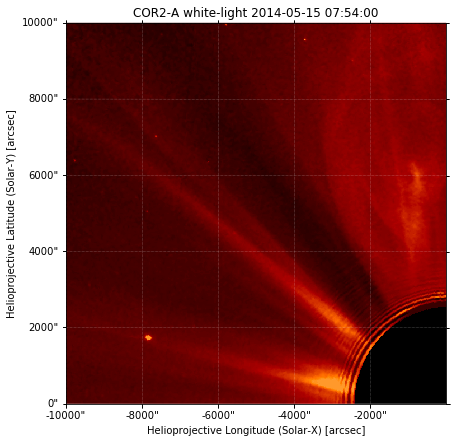

In [9]:
fig = plt.figure(figsize=(15, 15))
ax1 = fig.add_subplot(1, 2, 1, projection=smap)
smap.plot(axes=ax1, vmax=800)

In [10]:
# get the location of mars
mars = get_body_heliographic_stonyhurst('mars', map1.date, observer=map1.observer_coordinate)
mars_hpc = mars.transform_to(frames.Helioprojective(observer=map1.observer_coordinate))

INFO: Apparent body location accounts for 1269.95 seconds of light travel time [sunpy.coordinates.ephemeris]


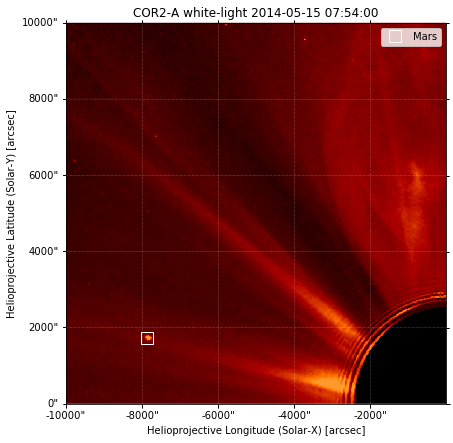

In [11]:
fig = plt.figure(figsize=(15, 15))
ax1 = fig.add_subplot(1, 2, 1, projection=smap)
smap.plot(axes=ax1, vmax=800)
ax1.plot_coord(mars_hpc, 's', color='white', fillstyle='none', markersize=12, label='Mars')
plt.legend()

### 1.2 Observer Position

All data objects contain coordinates for the observer.

In [12]:
map1.observer_coordinate

<SkyCoord (HeliographicStonyhurst: obstime=2014-05-15T07:54:00.005): (lon, lat, radius) in (deg, deg, m)
    (158.18219, 4.9816789, 1.4380171e+11)>

In [13]:
planet_list = ['earth', 'venus', 'mars', 'mercury']
planet_coord = [get_body_heliographic_stonyhurst(this_planet, time=map1.date) for this_planet in planet_list]

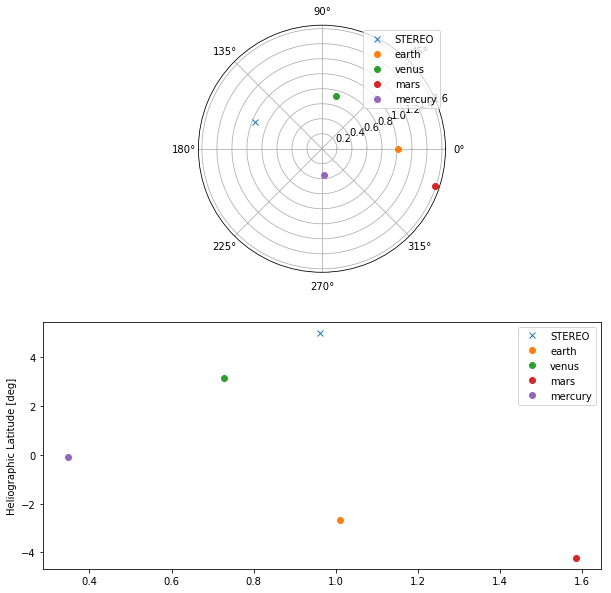

In [14]:
fig = plt.figure(figsize=(10, 10))
ax1 = plt.subplot(2, 1, 1, projection='polar')
plt.polar(np.deg2rad(map1.observer_coordinate.lon), map1.observer_coordinate.radius.to('au'), 'x',label='STEREO')
for this_planet, this_coord in zip(planet_list, planet_coord):
    plt.polar(np.deg2rad(this_coord.lon), this_coord.radius, 'o', label=this_planet)
plt.legend()
ax2 = plt.subplot(2, 1, 2)
ax2.plot(map1.observer_coordinate.radius.to('au'), map1.observer_coordinate.lat, 'x', label='STEREO')
for this_planet, this_coord in zip(planet_list, planet_coord):
    ax2.plot(this_coord.radius, this_coord.lat, 'o', label=this_planet)
ax2.set_ylabel('Heliographic Latitude [deg]')
plt.legend()

## Logging

for all of your messaging needs

In [15]:
from sunpy import log

In [16]:
log.info('Test')

INFO: Test [unknown]
